In [871]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [872]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage


 # 1. Loading and Preprocessing the Data

In [874]:
# Load the Iris dataset from sklearn
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = iris_data.copy()

In [875]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [876]:
iris_data.shape

(150, 4)

In [877]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [878]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [879]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [880]:
iris_data.duplicated().sum()

1

In [881]:
iris_data=iris_data.drop_duplicates()

In [882]:
# Standardizing the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 ## 2A. KMeans Clustering

KMeans is a centroid-based clustering algorithm that partitions data into 'k' clusters.
It iteratively assigns points to the nearest centroid and recalculates centroids until convergence.
 The centroids are subsequently updated by calculating the mean position of all points within each cluster. This iterative process continues until the centroids stabilize, meaning they no longer change significantly, or a predefined stopping condition is met.


In [885]:

# 2A. Determining Optimal Clusters using Elbow Method
# The elbow method helps determine the ideal number of clusters by analyzing the Within-Cluster Sum of Squares (WCSS).

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

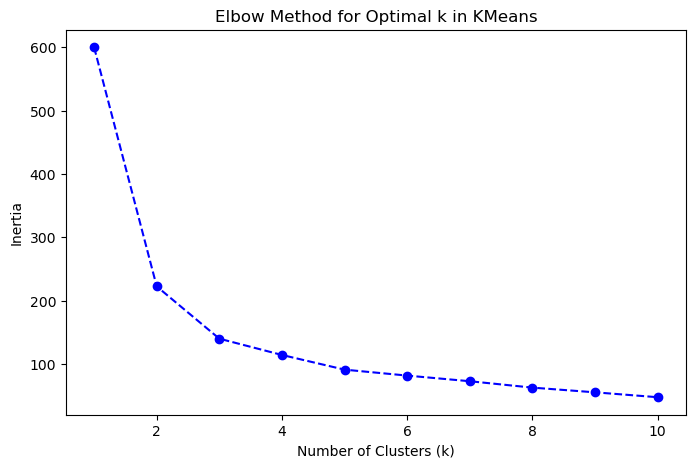

In [886]:
# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k in KMeans')
plt.show()

In [887]:
# Applying KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)


In [888]:
cluster_labels=kmeans.fit_predict(iris_data)

In [889]:
iris_data["Cluster"]=kmeans.labels_
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [890]:
iris_data["Cluster"].unique()

array([1, 2, 0])

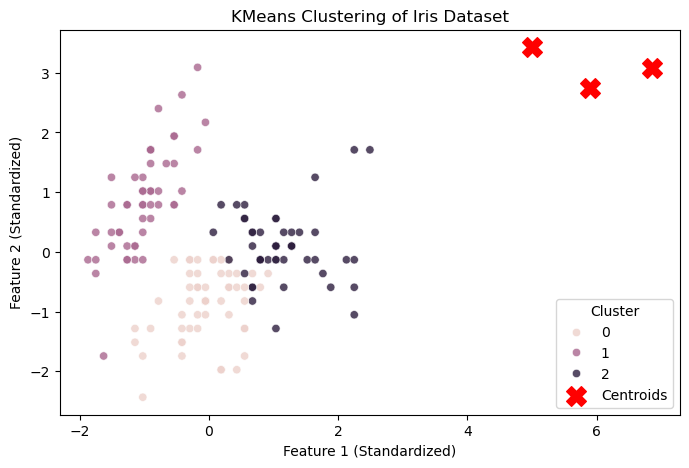

In [891]:
# Visualizing the KMeans clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster')
plt.show()

 # Hierarchical Clustering


 Hierarchical clustering creates a tree-like structure, successively merging similar clusters.
This is useful for understanding how clusters form at different distance levels.


In [894]:
 # Applying Agglomerative Clustering with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

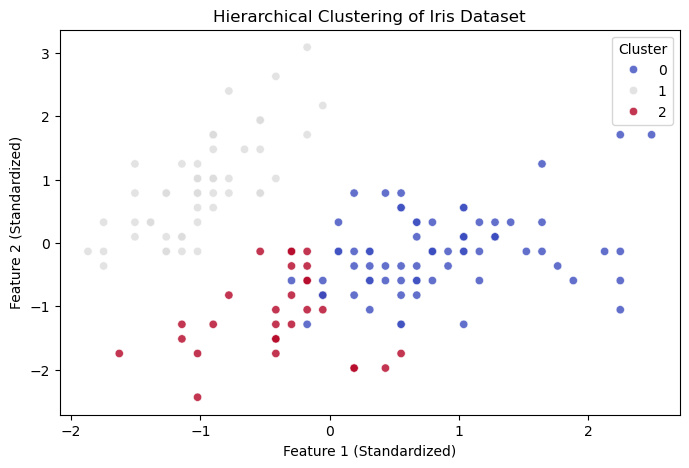

In [895]:

# Visualizing the Hierarchical Clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', alpha=0.8)
plt.title('Hierarchical Clustering of Iris Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster')
plt.show()


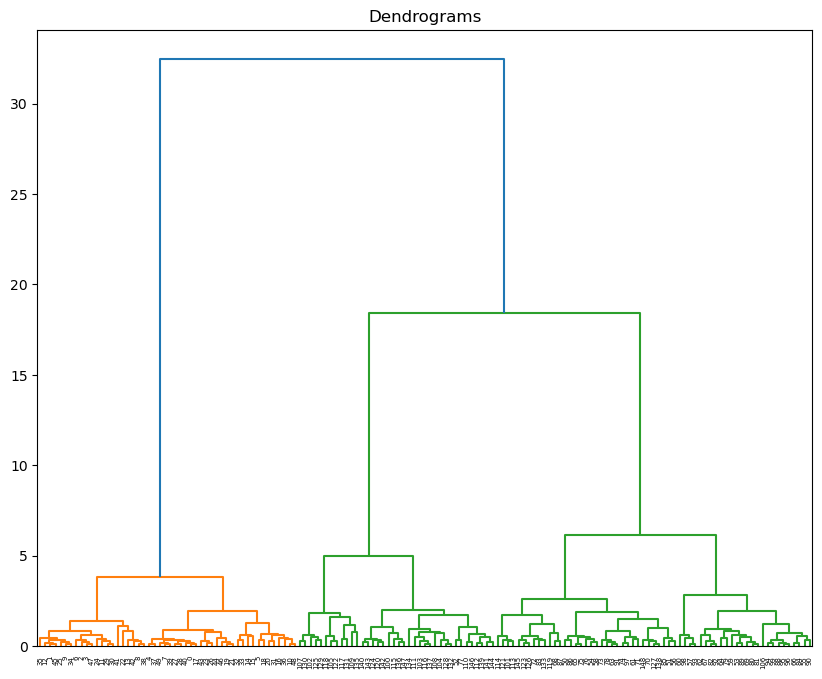

In [896]:
# Plot Dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage (iris_data, method='ward'))

In [897]:
clusters=AgglomerativeClustering()
clusters.fit_predict(iris_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [898]:
iris_data['cluster2']=clusters.fit_predict(iris_data)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,cluster2
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,0,0
148,6.2,3.4,5.4,2.3,0,0


In [899]:
iris_data["cluster2"].unique()

array([1, 0], dtype=int64)

In [900]:
uniquecolor=set(dend['color_list'])
uniquecolor

{'C0', 'C1', 'C2'}

In [901]:
optimal_number_of_clusters=len(uniquecolor)-1
optimal_number_of_clusters

2

# Evaluating Model Performance
To assess clustering quality, we use:
1. Silhouette Score - Measures how similar a point is to its cluster (higher is better)
2. Davies-Bouldin Index - Measures average similarity between clusters (lower is better)
3. Calinski-Harabasz Index - Measures cluster separation (higher is better)

In [903]:
# Evaluating KMeans
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

print("KMeans Clustering Performance:")
print(f"Silhouette Score: {silhouette_kmeans:.2f}")
print(f"Davies-Bouldin Index: {davies_kmeans:.2f}")
print(f"Calinski-Harabasz Index: {calinski_kmeans:.2f}\n")


KMeans Clustering Performance:
Silhouette Score: 0.46
Davies-Bouldin Index: 0.83
Calinski-Harabasz Index: 241.90



In [904]:
# Evaluate Model Performance
silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
davies_hierarchical = davies_bouldin_score(X_scaled, hierarchical_labels)
calinski_hierarchical = calinski_harabasz_score(X_scaled, hierarchical_labels)

print("Hierarchical Clustering Performance:")
print(f"Silhouette Score: {silhouette_hierarchical:.2f}")
print(f"Davies-Bouldin Index: {davies_hierarchical:.2f}")
print(f"Calinski-Harabasz Index: {calinski_hierarchical:.2f}")


Hierarchical Clustering Performance:
Silhouette Score: 0.45
Davies-Bouldin Index: 0.80
Calinski-Harabasz Index: 222.72


In this project, we implemented KMeans Clustering and Hierarchical Clustering on the Iris dataset 
to explore unsupervised learning techniques. After preprocessing the data by removing labels 
and applying feature scaling, we applied KMeans Clustering using the Elbow Method to determine 
the optimal number of clusters. We also implemented Agglomerative Hierarchical Clustering 
and visualized its structure with a dendrogram.
